# Time Series Forecasting with Support Vector Regression:
Support Vector Regression (SVR) has emerged as a powerful tool for time series forecasting due to its ability to handle nonlinear relationships and high-dimensional data. 

### Support Vector Regression (SVR) is a supervised learning technique in SVMs that aims to find the hyperplane in a high-dimensional feature space that best fits the training data and minimizes the prediction error for regression tasks. SVR is a technique used to predict continuous values. In time series forecasting with SVR, it’s considered a regression task.

## SVR works by drawing a line (in simpler cases) or a surface (in more complex situations) that best fits the data points. Regression aims to predict a continuous target variable based on one or more input features.

# KEy Component:

# 1. Hyperplane:
#### In SVR, the hyperplane is the line (for one-dimensional data), plane (for two-dimensional data), or hyperplane (for multidimensional data) that best fits the data points while maximizing the margin. The margin is the distance between the hyperplane and the support vectors. It acts as the decision boundary for predicting new data points.
# 2.Support Vectors: 
#### Support Vectors are the data points that are closest to the hyperplane and they determine the optimal sequence of the hyperplane. In SVR, the support vectors are the data points that fall within a certain margin around the predicted function (hyperplane).
# 3.Kernal Function:
####  SVR can handle non-linear relationships between features by employing kernel functions. These functions map the input data into a higher-dimensional space where a linear hyperplane can effectively separate or approximate the data. Common kernels include linear, polynomial, radial basis function (RBF), and sigmoid.
# 4. Regularization Parameter (C):
#### This parameter controls the trade-off between minimizing the training error and minimizing the model complexity. A smaller value of C encourages a smoother decision boundary (hyperplane) with more support vectors, while a larger value of C allows for a more flexible decision boundary but may lead to overfitting.
# 5. Epsilon ():
#### Epsilon defines the margin of tolerance where no penalty is given to errors. Data points outside the margin are considered errors and are penalized according to the loss function. Epsilon is a parameter in the SVR algorithm that determines the width of the margin around the predicted function.

# Q. Why SVR for Time Series Forecasting?


# 1.  NON LINEAR TRENDS -
##### Unlike traditional methods like ARIMA that assume linear relationships, SVR excels at handling complex, non-linear patterns often present in time series data. Stock prices, for instance, rarely follow a straight line, exhibiting seasonal fluctuations and unpredictable jumps. SVR, with the power of kernel functions, can capture these non-linear trends and make more accurate forecasts for future values.

# 2. Robustness Against Outliers - 
##### Time series data can be sensitive to outliers, like unexpected events or data collection errors. SVR’s focus on support vectors makes it less susceptible to the influence of outliers. Since it prioritizes the most informative data points for defining the hyperplane, outliers that deviate significantly from the overall trend have less impact on the model’s predictions.

# 3. Focusing on Future Predictions: 
##### By focusing on capturing the underlying trend rather than memorizing specific data points, SVR can make more reliable predictions for future time steps.

# Let's Implement it:

In [12]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

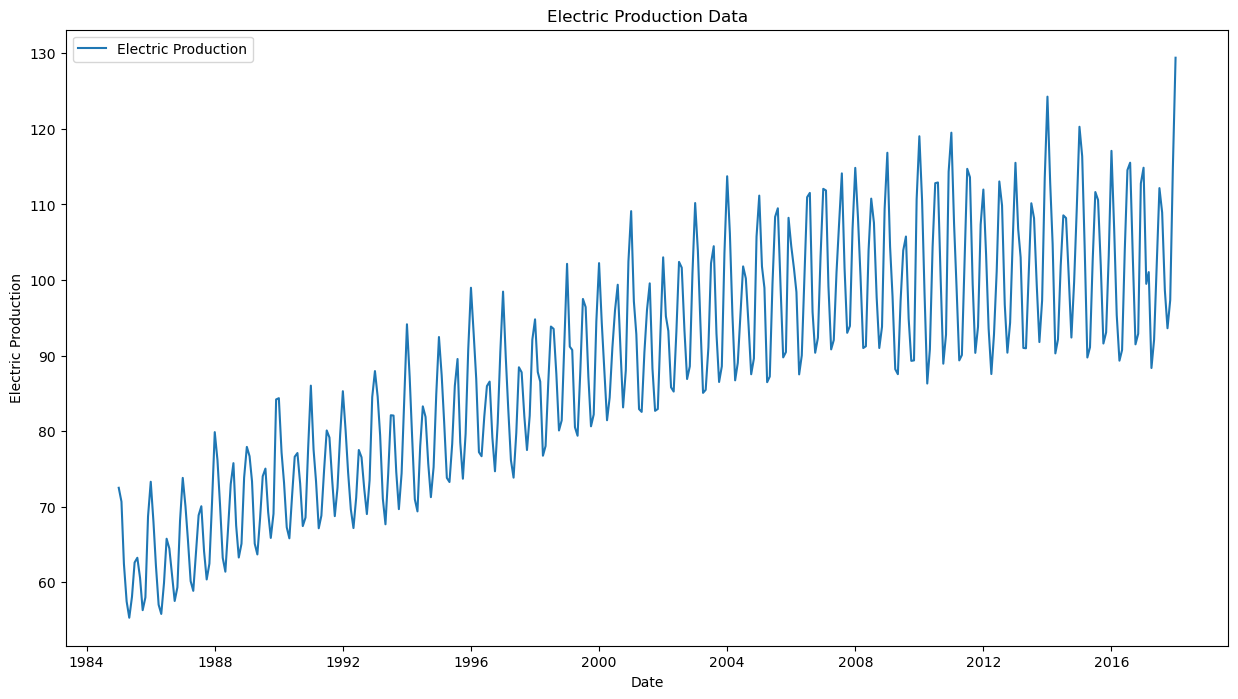

In [14]:
# Load the dataset
df = pd.read_csv('Electric_Production.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Visualize the data
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['IPG2211A2N'], label='Electric Production')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.title('Electric Production Data')
plt.legend()
plt.show()


In [16]:
# data preprocessing 
# Create training and testing datasets
train_start_dt = '1985-01-01'
test_start_dt = '2005-01-01'
train = df.loc[train_start_dt:test_start_dt]
test = df.loc[test_start_dt:]
train.head()


,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [18]:
# Data Scaling = The data is scaled using MinMaxScaler to ensure that all features are within the same range, typically between 0 and 1.
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)


#### The TIME_STEP is the number of time steps to use for creating sequences of input features and target variables.

It is used to prepare the training and testing datasets by creating sequences of input features and target variables based on the specified time steps, which is essential for training sequence prediction models like recurrent neural networks (RNNs) or support vector regression (SVR).

In [21]:
# Prepare the data for training
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5
X_train, y_train = create_dataset(train_scaled, train_scaled, TIME_STEPS)
X_test, y_test = create_dataset(test_scaled, test_scaled, TIME_STEPS)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(236, 5, 1) (236, 1)
(152, 5, 1) (152, 1)


### An SVR model is initialized with specified hyperparameters such as kernel type, gamma, C, and epsilon.

kernel=’rbf’ specifies the kernel function to be used. The radial basis function (RBF) kernel is commonly used in SVR.
gamma=0.5 is the parameter for the RBF kernel. It controls the influence of each training example. A low value means ‘far’ and a high value means ‘close’.
C=10 is the regularization parameter. It trades off correct classification of training examples against maximization of the decision function’s margin.
epsilon=0.05 is the epsilon parameter in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function.

In [24]:
# SVR model
model = SVR(kernel='rbf', gamma=0.5, C=10, epsilon=0.05)

# Fit the model
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)


C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, epsilon=0.05, gamma=0.5)

In [26]:
# Make predictions
train_pred = model.predict(X_train.reshape(X_train.shape[0], -1))
test_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

# Inverse scaling
train_pred_inv = scaler.inverse_transform(train_pred.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
test_pred_inv = scaler.inverse_transform(test_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))


In [28]:
# Evaluate the model
mse_train = mean_squared_error(y_train_inv, train_pred_inv)
mse_test = mean_squared_error(y_test_inv, test_pred_inv)
print("Mean Squared Error on Training Data:", mse_train)
print("Mean Squared Error on Testing Data:", mse_test)


Mean Squared Error on Training Data: 7.289992919226606
Mean Squared Error on Testing Data: 21.34532107347821


### Lower MSE values indicate that our model’s predictions are closer to the actual values, which is what we aim for. So, ideally, we want to minimize the MSE as much as possible.

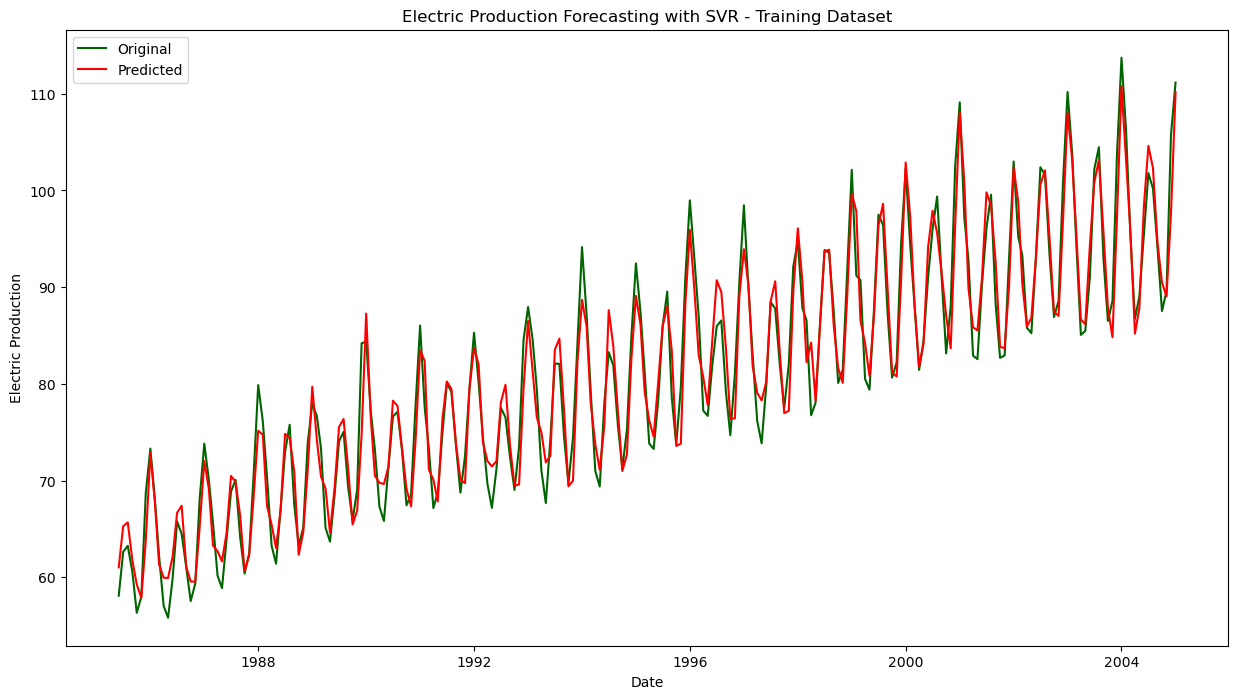

In [31]:
# Plotting the results for train dataset
plt.figure(figsize=(15, 8))
plt.plot(df.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], y_train_inv, label='Original', color='darkgreen')
plt.plot(df.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], train_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.title('Electric Production Forecasting with SVR - Training Dataset')
plt.legend()
plt.show()


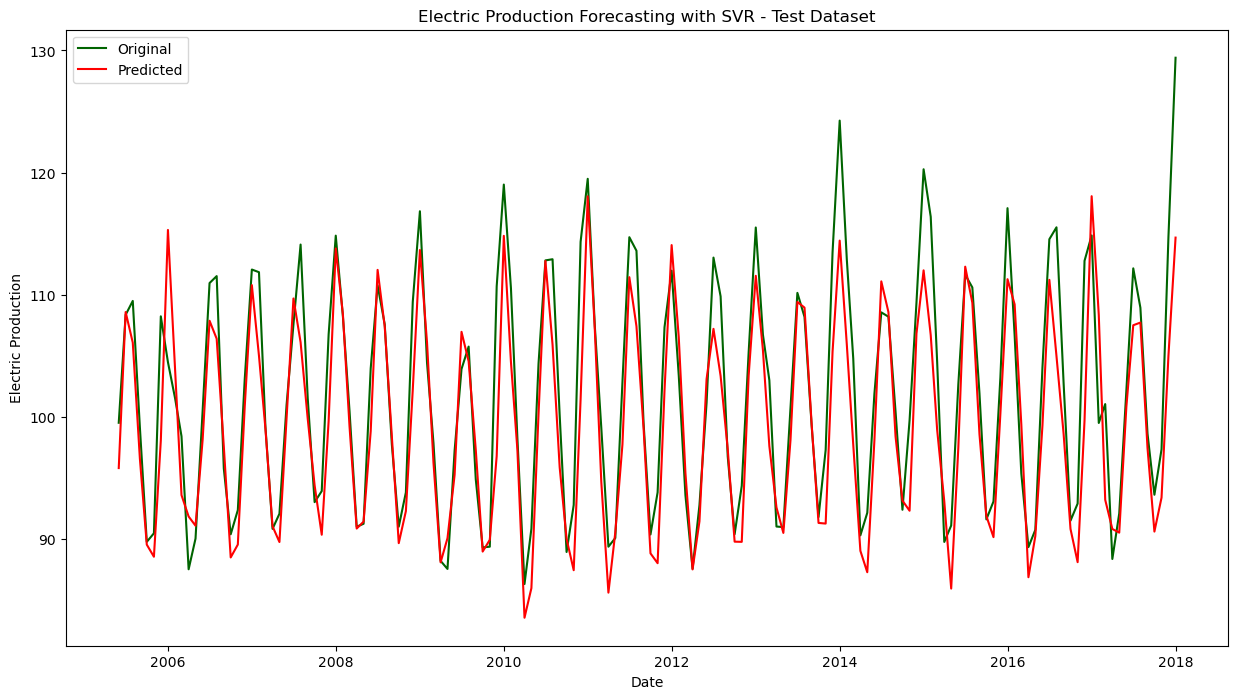

In [33]:
# Plotting the results for test dataset
plt.figure(figsize=(15, 8))
plt.plot(df.index[TIME_STEPS+len(train_pred_inv)+TIME_STEPS-1:], y_test_inv, label='Original', color='darkgreen')
plt.plot(df.index[TIME_STEPS+len(train_pred_inv)+TIME_STEPS-1:], test_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.title('Electric Production Forecasting with SVR - Test Dataset')
plt.legend()
plt.show()


### Plotting Forecast Graph
##### 1. Set the number of time steps that we want to forecast.
##### 2. 
Create a forecasting loop, the next prediction is based on the last sequence using SVR and predicted valued is appended to future_forecast then, the last sequence is updated by shifting it by one position and replacing the last element with the predicted value
.##### 3. 
Perform inverse scali
n##### 4. g
Generate future timestamps then, plot the graphecast

C:\Users\Hi\AppData\Local\Temp\ipykernel_13120\755194884.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=future_steps+1, freq='M')[1:]


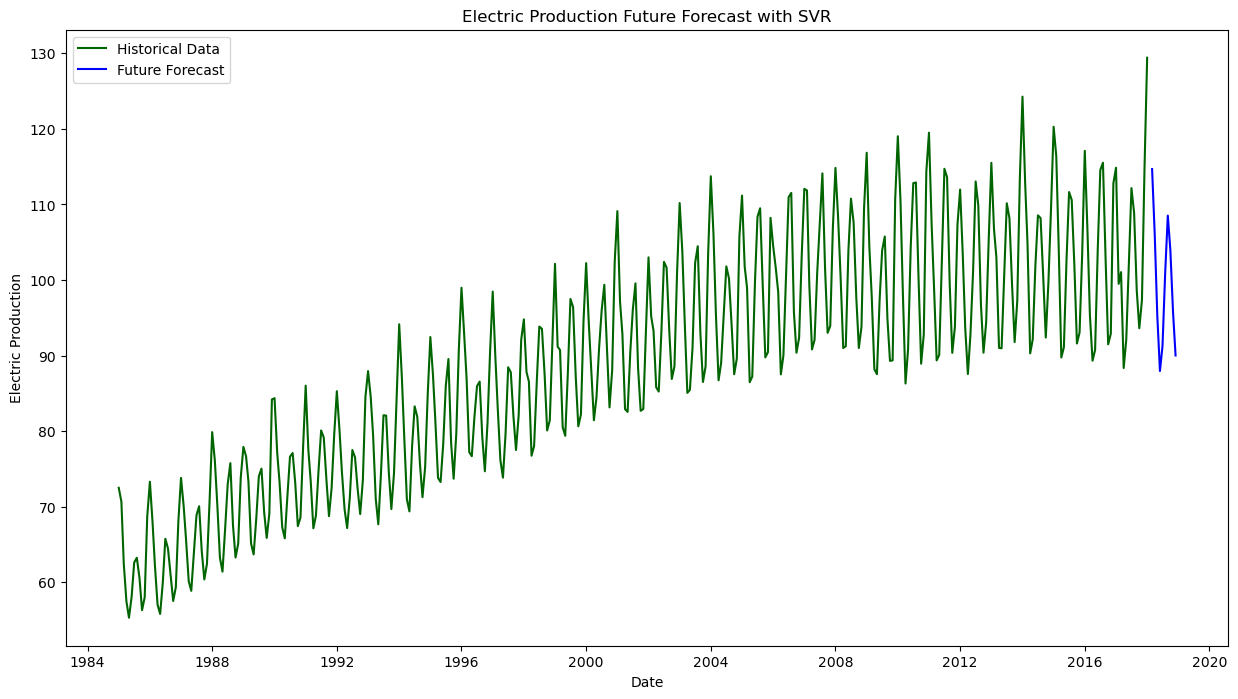

In [38]:
# Number of future time steps to forecast
future_steps = 10  # Adjust this as needed

# Last `TIME_STEPS` values from the test set to start forecasting
last_sequence = X_test[-1]

# Forecast future values
future_forecast = []
for _ in range(future_steps):
    # Predict next value based on the last sequence
    next_pred = model.predict(last_sequence.reshape(1, -1))
    future_forecast.append(next_pred[0])
    # Update the last sequence by removing the first element and adding the predicted value
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

# Inverse scaling for future forecast
future_forecast_inv = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Generate future timestamps
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps+1, freq='M')[1:]

# Plotting the future forecast
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['IPG2211A2N'], label='Historical Data', color='darkgreen')
plt.plot(future_dates, future_forecast_inv, label='Future Forecast', color='blue')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.title('Electric Production Future Forecast with SVR')
plt.legend()
plt.show()


In [42]:
print(future_forecast 
)

[1.0162752091172285, 0.8670007523521216, 0.6837434691869376, 0.5588424908811419, 0.6154884966723696, 0.7796095928342283, 0.9108970621777758, 0.8326633274526106, 0.6938770398323953, 0.5940162563347894]


In [44]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [75]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


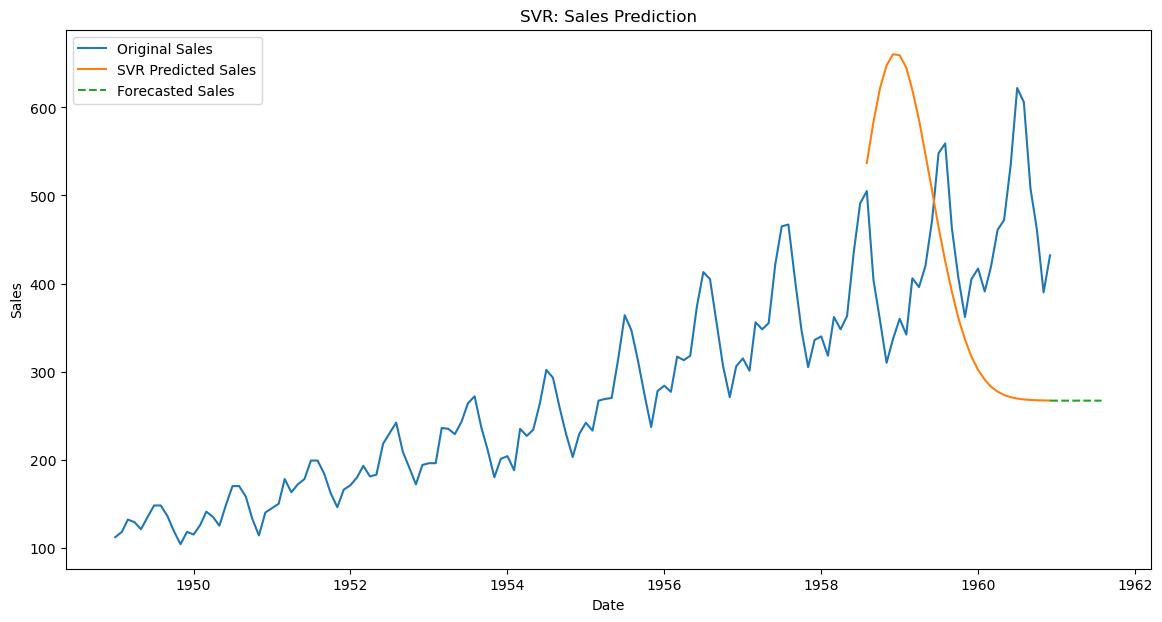

            forecasted_sales
1960-12-02        267.090175
1960-12-03        267.058792
1960-12-04        267.042709
1960-12-05        267.034681
1960-12-06        267.030777


In [133]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('sales.csv')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort data by date
data.sort_values('Date', inplace=True)

# Set the date column as the index
data.set_index('Date', inplace=True)

# Extract the sales column for the analysis
sales_data = data['Sales']

# Prepare the data for SVR
X = np.array(range(len(sales_data))).reshape(-1, 1)  # Use indices as features
y = sales_data.values  # Sales values as target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

# Train the SVR model
svr = SVR(kernel='rbf', C=50, gamma=13,epsilon=0.001)
svr.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Define the number of steps to forecast
n_forecast_steps = 8 * 30  # Assuming 30 days per month

# Create indices for forecasting
X_forecast = np.array(range(len(sales_data), len(sales_data) + n_forecast_steps)).reshape(-1, 1)
X_forecast_scaled = scaler_X.transform(X_forecast)

# Forecast future sales
y_forecast_scaled = svr.predict(X_forecast_scaled)
y_forecast = scaler_y.inverse_transform(y_forecast_scaled.reshape(-1, 1)).flatten()

# Create a DataFrame for the forecasted sales
forecast_index = pd.date_range(start=sales_data.index[-1] + pd.Timedelta(days=1), periods=n_forecast_steps)
forecast_data = pd.DataFrame(data=y_forecast, index=forecast_index, columns=['forecasted_sales'])

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(sales_data, label='Original Sales')
plt.plot(sales_data.index[-len(y_test):], y_pred, label='SVR Predicted Sales')
plt.plot(forecast_data.index, forecast_data['forecasted_sales'], label='Forecasted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('SVR: Sales Prediction')
plt.legend()
plt.show()

# Show the forecast data
print(forecast_data.head())


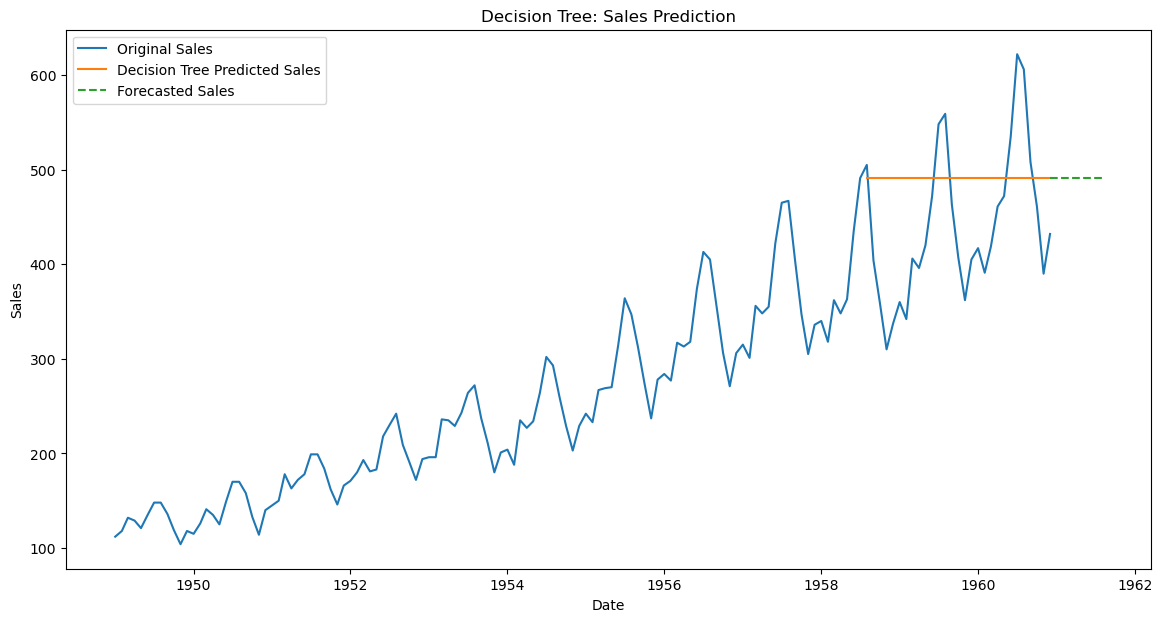

            forecasted_sales
1960-12-02             491.0
1960-12-03             491.0
1960-12-04             491.0
1960-12-05             491.0
1960-12-06             491.0


In [135]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('sales.csv')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort data by date
data.sort_values('Date', inplace=True)

# Set the date column as the index
data.set_index('Date', inplace=True)

# Extract the sales column for the analysis
sales_data = data['Sales']

# Prepare the data for Decision Tree
X = np.array(range(len(sales_data))).reshape(-1, 1)  # Use indices as features
y = sales_data.values  # Sales values as target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

# Train the Decision Tree model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = decision_tree.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Define the number of steps to forecast
n_forecast_steps = 8 * 30  # Assuming 30 days per month

# Create indices for forecasting
X_forecast = np.array(range(len(sales_data), len(sales_data) + n_forecast_steps)).reshape(-1, 1)
X_forecast_scaled = scaler_X.transform(X_forecast)

# Forecast future sales
y_forecast_scaled = decision_tree.predict(X_forecast_scaled)
y_forecast = scaler_y.inverse_transform(y_forecast_scaled.reshape(-1, 1)).flatten()

# Create a DataFrame for the forecasted sales
forecast_index = pd.date_range(start=sales_data.index[-1] + pd.Timedelta(days=1), periods=n_forecast_steps)
forecast_data = pd.DataFrame(data=y_forecast, index=forecast_index, columns=['forecasted_sales'])

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(sales_data, label='Original Sales')
plt.plot(sales_data.index[-len(y_test):], y_pred, label='Decision Tree Predicted Sales')
plt.plot(forecast_data.index, forecast_data['forecasted_sales'], label='Forecasted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Decision Tree: Sales Prediction')
plt.legend()
plt.show()

# Show the forecast data
print(forecast_data.head())
